In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df=df.drop('id',axis=1)

In [10]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


<Figure size 864x648 with 0 Axes>

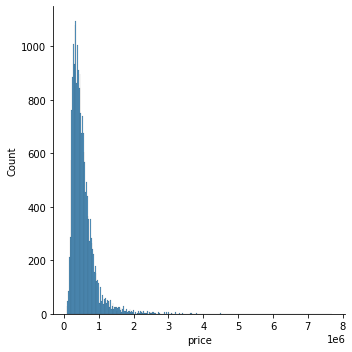

In [15]:
plt.figure(figsize=(12,9))
sns.displot(df['price'])

In [17]:
df.corr()['price'].sort_valuesues()

zipcode         -0.053402
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

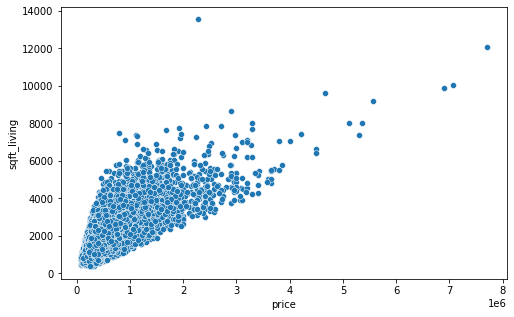

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

# Clean some extreme outliers from our df

In [22]:
df_with_no_ouliers=df.sort_values('price',ascending=False).iloc[216:]

In [26]:
df_with_no_ouliers.shape

(21381, 20)

In [27]:
df.shape

(21597, 20)

<AxesSubplot:xlabel='long', ylabel='lat'>

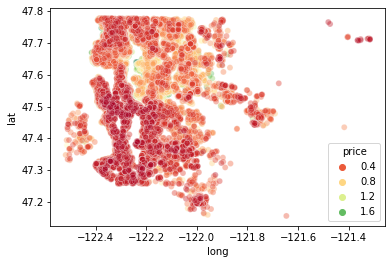

In [30]:
sns.scatterplot(x='long',y='lat',data=df_with_no_ouliers,palette='RdYlGn',hue='price',alpha=0.4)

<AxesSubplot:xlabel='long', ylabel='lat'>

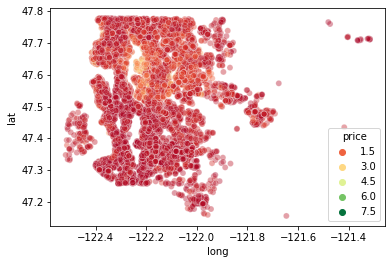

In [31]:
sns.scatterplot(x='long',y='lat',data=df,palette='RdYlGn',hue='price',alpha=0.4)

# Cleaning more columns in our df_with_no_ouliers

In [37]:
df_with_no_ouliers['date']=pd.to_datetime(df_with_no_ouliers['date'])

In [40]:
df_with_no_ouliers['year']=df_with_no_ouliers['date'].apply(lambda date: date.year)

In [41]:
df_with_no_ouliers['month']=df_with_no_ouliers['date'].apply(lambda date: date.month)

In [43]:
df_with_no_ouliers.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


In [44]:
df_with_no_ouliers=df_with_no_ouliers.drop('date',axis=1)

In [47]:
df_with_no_ouliers.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2


In [48]:
df_with_no_ouliers=df_with_no_ouliers.drop('zipcode',axis=1)

In [49]:
df_with_no_ouliers.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.5,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10


# Train Test Split

In [54]:
X=df_with_no_ouliers.drop('price',axis=1).values
y=df_with_no_ouliers['price'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling our data

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler=MinMaxScaler()

In [65]:
scaler.fit(X_train)

MinMaxScaler()

In [66]:
X_train=scaler.transform(X_train)

In [67]:
X_test=scaler.transform(X_test)

# Model Creation

In [68]:
from tensorflow.keras.models import Sequential

In [69]:
from tensorflow.keras.layers import Dense

In [70]:
myModel=Sequential()

In [71]:
X_train.shape

(14966, 19)

In [72]:
myModel.add(Dense(19,activation='relu'))
myModel.add(Dense(19,activation='relu'))
myModel.add(Dense(19,activation='relu'))
myModel.add(Dense(19,activation='relu'))
myModel.add(Dense(1))

In [73]:
myModel.compile(optimizer='adam',loss='mse')

In [75]:
myModel.fit(x=X_train,y=y_train,epochs=400,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/400
117/117 [==============================] - 1s 4ms/step - loss: 346870415360.0000 - val_loss: 356836769792.0000
Epoch 2/400
117/117 [==============================] - 0s 4ms/step - loss: 345815121920.0000 - val_loss: 353163313152.0000
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 331909169152.0000 - val_loss: 321074266112.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 266126655488.0000 - val_loss: 211752747008.0000
Epoch 5/400
117/117 [==============================] - 0s 4ms/step - loss: 135180673024.0000 - val_loss: 80125804544.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 60055252992.0000 - val_loss: 55337922560.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 53679931392.0000 - val_loss: 54091804672.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 52650676224.0000 - val_loss: 52981866496.0000
Epoch 9/400
117/117 [==

117/117 [==============================] - 0s 2ms/step - loss: 23626616832.0000 - val_loss: 24290347008.0000
Epoch 69/400
117/117 [==============================] - 0s 2ms/step - loss: 23570329600.0000 - val_loss: 24246644736.0000
Epoch 70/400
117/117 [==============================] - 0s 2ms/step - loss: 23528835072.0000 - val_loss: 24248342528.0000
Epoch 71/400
117/117 [==============================] - 0s 2ms/step - loss: 23490349056.0000 - val_loss: 24168980480.0000
Epoch 72/400
117/117 [==============================] - 0s 2ms/step - loss: 23439171584.0000 - val_loss: 24147142656.0000
Epoch 73/400
117/117 [==============================] - 0s 2ms/step - loss: 23414542336.0000 - val_loss: 24204412928.0000
Epoch 74/400
117/117 [==============================] - 0s 2ms/step - loss: 23400378368.0000 - val_loss: 24179197952.0000
Epoch 75/400
117/117 [==============================] - 0s 2ms/step - loss: 23361034240.0000 - val_loss: 24025933824.0000
Epoch 76/400
117/117 [===============

Epoch 135/400
117/117 [==============================] - 0s 2ms/step - loss: 21789650944.0000 - val_loss: 22606389248.0000
Epoch 136/400
117/117 [==============================] - 0s 2ms/step - loss: 21773445120.0000 - val_loss: 22603036672.0000
Epoch 137/400
117/117 [==============================] - 0s 2ms/step - loss: 21755392000.0000 - val_loss: 22575992832.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 21730428928.0000 - val_loss: 22574313472.0000
Epoch 139/400
117/117 [==============================] - 0s 2ms/step - loss: 21736949760.0000 - val_loss: 22569246720.0000
Epoch 140/400
117/117 [==============================] - 0s 2ms/step - loss: 21717178368.0000 - val_loss: 22537330688.0000
Epoch 141/400
117/117 [==============================] - 0s 2ms/step - loss: 21715617792.0000 - val_loss: 22542010368.0000
Epoch 142/400
117/117 [==============================] - 0s 2ms/step - loss: 21683097600.0000 - val_loss: 22528356352.0000
Epoch 143/400
11

117/117 [==============================] - 0s 2ms/step - loss: 21221535744.0000 - val_loss: 22071453696.0000
Epoch 202/400
117/117 [==============================] - 0s 3ms/step - loss: 21217542144.0000 - val_loss: 22057187328.0000
Epoch 203/400
117/117 [==============================] - 0s 3ms/step - loss: 21208879104.0000 - val_loss: 22063992832.0000
Epoch 204/400
117/117 [==============================] - 0s 3ms/step - loss: 21225238528.0000 - val_loss: 22053816320.0000
Epoch 205/400
117/117 [==============================] - 0s 3ms/step - loss: 21214963712.0000 - val_loss: 22119821312.0000
Epoch 206/400
117/117 [==============================] - 0s 3ms/step - loss: 21219600384.0000 - val_loss: 22046885888.0000
Epoch 207/400
117/117 [==============================] - 0s 2ms/step - loss: 21193287680.0000 - val_loss: 22205954048.0000
Epoch 208/400
117/117 [==============================] - 0s 2ms/step - loss: 21198149632.0000 - val_loss: 22129852416.0000
Epoch 209/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 21044905984.0000 - val_loss: 21932204032.0000
Epoch 268/400
117/117 [==============================] - 0s 3ms/step - loss: 21061543936.0000 - val_loss: 21873117184.0000
Epoch 269/400
117/117 [==============================] - 0s 2ms/step - loss: 21042739200.0000 - val_loss: 21879296000.0000
Epoch 270/400
117/117 [==============================] - 0s 2ms/step - loss: 21036075008.0000 - val_loss: 21852536832.0000
Epoch 271/400
117/117 [==============================] - 0s 2ms/step - loss: 21019668480.0000 - val_loss: 22031902720.0000
Epoch 272/400
117/117 [==============================] - 0s 2ms/step - loss: 21013088256.0000 - val_loss: 21963417600.0000
Epoch 273/400
117/117 [==============================] - 0s 2ms/step - loss: 21018875904.0000 - val_loss: 21844946944.0000
Epoch 274/400
117/117 [==============================] - 0s 2ms/step - loss: 21051533312.0000 - val_loss: 21889572864.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20912820224.0000 - val_loss: 21723058176.0000
Epoch 334/400
117/117 [==============================] - 0s 2ms/step - loss: 20926672896.0000 - val_loss: 21714966528.0000
Epoch 335/400
117/117 [==============================] - 0s 2ms/step - loss: 20918108160.0000 - val_loss: 21780183040.0000
Epoch 336/400
117/117 [==============================] - 0s 2ms/step - loss: 20930695168.0000 - val_loss: 21768912896.0000
Epoch 337/400
117/117 [==============================] - 0s 2ms/step - loss: 20904462336.0000 - val_loss: 21713467392.0000
Epoch 338/400
117/117 [==============================] - 0s 2ms/step - loss: 20908288000.0000 - val_loss: 21789933568.0000
Epoch 339/400
117/117 [==============================] - 0s 2ms/step - loss: 20903880704.0000 - val_loss: 21815146496.0000
Epoch 340/400
117/117 [==============================] - 0s 2ms/step - loss: 20903372800.0000 - val_loss: 21756968960.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20834625536.0000 - val_loss: 21746515968.0000
Epoch 400/400
117/117 [==============================] - 0s 2ms/step - loss: 20828805120.0000 - val_loss: 21640591360.0000


In [81]:
predictions=myModel.predict(X_test)

# Model Evaluation

In [78]:
losses=pd.DataFrame(myModel.history.history)

<AxesSubplot:>

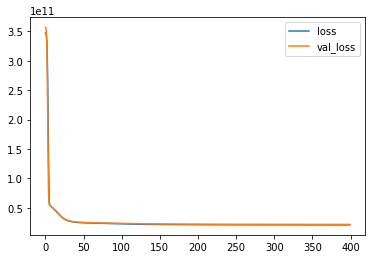

In [79]:
losses.plot()

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
mean_absolute_error(y_test,predictions)

99585.63007234022

In [85]:
mean_squared_error(y_test,predictions)

21640594996.70732

In [86]:
np.sqrt(mean_squared_error(y_test,predictions))

147107.4267217917

In [87]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


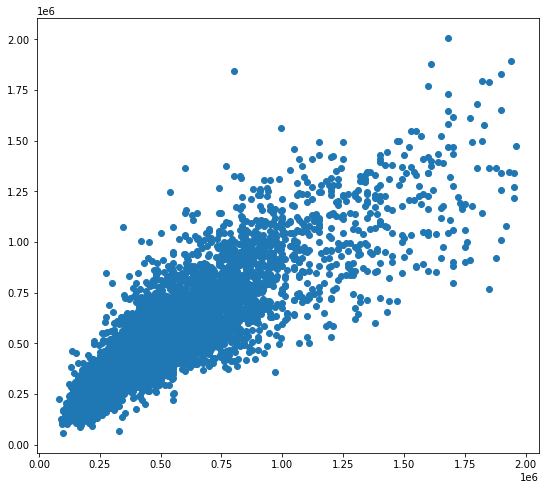

In [90]:
plt.figure(figsize=(9,8))
plt.scatter(y_test,predictions)